### Oppgave 4: Dataanalyse

I denne delen av prosjektet skal dere bruke verktøy som NumPy, Pandas, Matplotlib osv. til å beregne statistiske mål som gjennomsnitt, median og standardavvik, som er essensielle for å forstå datakvaliteten og identifisere trender. Videre vil dere implementere enkle statistiske analyser for å avdekke mønstre i dataene, noe som kan gi innsikt i miljøforholdene over tid. Denne analysen vil danne grunnlaget for videre visualisering og prediktiv analyse, og bidra til en dypere forståelse av de miljømessige faktorene som påvirker samfunnet.

*Vurderingskriterier:*

1. Hvordan kan du bruke NumPy og Pandas til å beregne gjennomsnitt, median og standardavvik for de innsamlede dataene, og hvorfor er disse statistiske målene viktige?
2. Kan du gi et eksempel på hvordan du vil implementere en enkel statistisk analyse for å undersøke sammenhengen mellom to variabler i datasettet?
3. Hvordan planlegger du å håndtere eventuelle skjevheter i dataene under analysen, og hvilke metoder vil du bruke for å sikre at analysen er pålitelig?
4. Hvilke visualiseringer vil du lage for å støtte analysen din, og hvordan vil disse visualiseringene hjelpe deg med å formidle funnene dine?

Oppgave 4 omfatter en statistisk analyse av to datasett: ett med luftkvalitetsmålinger og ett med værdata. Ved hjelp av Pandas og NumPy ble det beregnet sentraltendensmål som gjennomsnitt og median, samt standardavvik for ulike vær- og luftkvalitetsvariabler.

Gjennomsnittet gir en indikasjon på det generelle nivået av en variabel, mens medianen mens medianen fungerer som et mer robust estimat i tilfeller der datasettet er skjevt eller inneholder ekstreme verdier. Standardavviket beskriver hvor mye observasjonene avviker fra gjennomsnittet, og er dermed nyttig for å vurdere graden av stabilitet eller volatilitet i dataene over tid.


Disse statistiske beregningene er sentrale fordi de gir et nødvendig grunnlag for å forstå strukturen, kvaliteten og egenskapene ved datasettet før mer avanserte analyser gjennomføres. Ved å beregne mål for sentraltendens, som gjennomsnitt og median, samt mål for spredning som standardavvik, kan man få innsikt i hva som er typisk for datasettet, og hvor stor variasjon det er i observasjonene. Dette er særlig viktig i miljømålinger, hvor dataverdiene ofte påvirkes av både naturlige variasjoner (som værforhold og sesongendringer) og menneskeskapte forhold (som utslipp og urbanisering).

Slike beregninger er også avgjørende for å kunne avdekke mønstre og trender. Formålet med den statistiske analysen er derfor ikke bare å oppsummere data, men også å gi en dypere forståelse av de underliggende prosessene og forholdene som påvirker miljøvariablene i datasettet.


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import sys

# Importer funksjoner for å kunne beregne statistikk
sys.path.append("../src")
from funksjoner import beregn_statistikk

# Henter inn data fra to forskjellige JSON-filer
path_df1 = "../data/df1_data.json"
path_df2 = "../data/df2_data.json"

#Forskjellige variabler i de to datasettene
tid_df1 = "date"
tid_df2 = "referenceTime"

# Leser inn data fra JSON-filer og konverterer til DataFrame
def les_data(file_path, variable, tid):
    with open(file_path, "r", encoding="utf-8") as file:
        raw_data = json.load(file)
    return pd.DataFrame({
        tid: pd.to_datetime(list(raw_data[tid].values()), unit="ms"),
        "value": list(raw_data[variable].values())
    })

In [ ]:
# Leser temperaturdata og beregner statistikk
temperatur = les_data(path_df2, "mean(air_temperature P1D)", tid_df2)
stat = beregn_statistikk(temperatur, kolonne="value", tidskolonne=tid_df2)

# Skriv ut resultatene
print(f"Gjennomsnittstemperatur: {stat['gjennomsnitt']:.2f} °C")
print(f"Median: {stat['median']:.2f} °C")
print(f"Standardavvik: {stat['standardavvik']:.2f} °C")

In [ ]:
luftfuktighet = les_data(path_df2, "mean(relative_humidity P1D)", tid_df2)
stat = beregn_statistikk(luftfuktighet, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnitt relativ luftfuktighet: {stat['gjennomsnitt']:.2f} %")
print(f"Median: {stat['median']:.2f} %")
print(f"Standardavvik: {stat['standardavvik']:.2f} %")

In [ ]:
nedbør = les_data(path_df2, "sum(precipitation_amount P1D)",tid_df2)
stat = beregn_statistikk(nedbør, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnittlig nedbør: {stat['gjennomsnitt']:.2f} mm")
print(f"Median: {stat['median']:.2f} mm")
print(f"Standardavvik: {stat['standardavvik']:.2f} mm")

In [ ]:
vindhastighet = les_data(path_df2, "mean(wind_speed P1D)",tid_df2)
stat = beregn_statistikk(vindhastighet, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnittlig vindhastighet: {stat['gjennomsnitt']:.2f} m/s")
print(f"Median: {stat['median']:.2f} m/s")
print(f"Standardavvik: {stat['standardavvik']:.2f} m/s")

In [ ]:
CO = les_data(path_df1, "CO", tid_df1)
stat = beregn_statistikk(CO, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt CO: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

In [ ]:
NOx = les_data(path_df1, "NOx", tid_df1)
stat = beregn_statistikk(NOx, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt NOx: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

In [ ]:
PM10 = les_data(path_df1, "PM10", tid_df1)
stat = beregn_statistikk(PM10, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt PM10: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

In [ ]:
PM2_5 = les_data(path_df1, "PM2.5", tid_df1)
stat = beregn_statistikk(PM2_5, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt PM2.5: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

### Statistisk analyse for å undersøke sammenhengen mellom to variabler i datasettet

For å undersøke sammenhengen mellom to variabler i datasettet, startet vi med å gjennomføre en korrelasjonsanalyse. Ved hjelp av Pandas ble observasjonene for hver variabel aggregert til daglige gjennomsnitt, slik at dataseriene ble sammenlignbare på tvers av tid.

Denne metoden gjorde det mulig å raskt identifisere hvilke kombinasjoner av variabler som hadde høyest grad av lineær samvariasjon. Ved å utforske flere par, kunne vi avdekke hvilke sammenhenger som var mest relevante for videre analyse. Korrelasjonskoeffisienten gir et mål på både styrken og retningen på den lineære relasjonen mellom to variabler, og er derfor et effektivt første steg i en statistisk undersøkelse. Det gir et kvantitativt grunnlag for å vurdere om en dypere analyse, som for eksempel regresjon, er hensiktsmessig.

In [ ]:
# Funksjon for å beregne korrelasjon mellom to datasett
def beregn_korrelasjon(df1, tid1, df2, tid2):
    series1 = df1.groupby(df1[tid1].dt.date)["value"].mean()
    series2 = df2.groupby(df2[tid2].dt.date)["value"].mean()

    # Sikrer at begge serier har samme indeks (datoer)
    common_dates = series1.index.intersection(series2.index)
    aligned1 = series1.loc[common_dates]
    aligned2 = series2.loc[common_dates]
    
    mask = (~aligned1.isna()) & (~aligned2.isna())
    return aligned1[mask].corr(aligned2[mask])

In [ ]:
# Beregner korrelasjon mellom temperatur og NOx
korrelasjon_1 = beregn_korrelasjon(NOx, tid_df1,vindhastighet, tid_df2)
print(f"Korrelasjon mellom vindhastighet og lokal forurensning: {korrelasjon_1:.2f}")

In [ ]:
korrelasjon_2 = beregn_korrelasjon(PM10, tid_df1,vindhastighet, tid_df2)
print(f"Korrelasjon mellom vindhastighet og store partikler i luften: {korrelasjon_2:.2f}")

In [ ]:
korrelasjon_3 = beregn_korrelasjon(PM10, tid_df1,nedbør, tid_df2)
print(f"Korrelasjon mellom nedbør og store partikler i luften: {korrelasjon_3:.2f}")

In [ ]:
korrelasjon_4 = beregn_korrelasjon(PM2_5, tid_df1,luftfuktighet, tid_df2)
print(f"Korrelasjon mellom luftfuktighet og små partikler i luften: {korrelasjon_4:.2f}")

### Regresjonsanalyse og beregning av R² for variabelparet med sterkest sammenheng

Basert på den innledende korrelasjonsanalysen ble det identifisert at vindhastighet og lokal luftforurensning hadde den sterkeste sammenhengen blant de undersøkte variablene. For å undersøke dette forholdet nærmere ble det gjennomført en lineær regresjonsanalyse, hvor formålet var å modellere hvordan endringer i vindhastighet påvirker nivåene av NOx i luften.

Den lineære regresjonsmodellen ble implementert ved hjelp av SciPy-biblioteket. Modellens formål er å kvantifisere hvordan variasjoner i vindhastighet påvirker nivåene av NOx. Analysen estimerte både stigningstall og konstantledd for regresjonslinjen, som til sammen beskriver retningen og styrken på den lineære sammenhengen.

I tillegg ble R²-verdien beregnet for å evaluere modellens forklaringskraft. R² uttrykker hvor stor andel av variasjonen i den avhengige variabelen (NOx) som kan forklares av endringer i den uavhengige variabelen (vindhastighet). En høy R²-verdi indikerer at den lineære modellen gir en god tilpasning til observasjonene, mens en lav verdi antyder svak sammenheng eller høy grad av støy i dataene.

Regresjonsanalysen fungerer dermed som et sentralt verktøy for å identifisere og kvantifisere potensielle årsakssammenhenger i datasettet, og resultatene danner et solid grunnlag for videre visualisering og tolkning av sammenhengen mellom miljøvariabler.


In [ ]:
from scipy.stats import linregress

# Beregner gjennomsnittlig vindhastighet og NOx per dag
wind_per_day = vindhastighet.groupby(vindhastighet[tid_df2].dt.date)["value"].mean()
nox_per_day = NOx.groupby(NOx[tid_df1].dt.date)["value"].mean()

# Sikrer at begge serier har samme indeks (datoer)
common_dates = wind_per_day.index.intersection(nox_per_day.index)
wind_aligned = wind_per_day.loc[common_dates]
nox_aligned = nox_per_day.loc[common_dates]

# Fjern manglende verdier
mask = (~wind_aligned.isna()) & (~nox_aligned.isna())
x = wind_aligned[mask].values
y = nox_aligned[mask].values

# Kjør regresjon med SciPy
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"R² mellom vindhastighet og lokal forurensning: {r_value**2:.2f}")

En R²-verdi på 0.15 inidkerer at forholdet mellom vindhastighet og lokal forurensning har en svak lineær sammenheng. Likevel ønsket vi å undersøke om det fantes en visuell trend, og om enkelte verdier eller uteliggere kunne påvirke tolkningen.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lag regresjonslinje-data
x_lin = np.linspace(min(x), max(x), 100)
y_lin = slope * x_lin + intercept

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label="Observasjoner")
plt.plot(x_lin, y_lin, color='red', label='Regresjonslinje')

# Legg til R² og korrelasjon i grafen
tekst = f"Korrelasjon: {korrelasjon_1:.2f}\nR²: {r_value**2:.2f}"
plt.text(0.84, 0.84, tekst, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray"))

# Pynt grafen
plt.xlabel("Vindhastighet (m/s)", fontsize=12)
plt.ylabel("NOx (µg/m³)", fontsize=12)
plt.title("Sammenheng mellom vindhastighet og NOx-konsentrasjon", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Etter å ha plottet dataene i et scatter plot, observerer vi en svak negativ trend mellom vindhastighet og NOx. Dette støtter hypotesen om at økt vindhastighet kan bidra til å spre luftforurensning, og dermed redusere konsentrasjonen av NOx lokalt. Punktfordelingen er likevel relativt spredt, og regresjonslinjen skjærer gjennom en stor sky av data – noe som bekrefter at det finnes mange andre faktorer som påvirker NOx-nivåene utover vind alene.'

Visualiseringen gir derfor et mer nyansert bilde: den bekrefter at det finnes en svak sammenheng, men også at modellen er begrenset i forklaringskraft, noe som fremgår både av lav R² og spredte datapunkter.

Et scatter plot viser sammenhengen mellom to variabler. Hvis punktene danner et tydelig mønster (for eksempel en stigende eller synkende linje), tyder det på en sammenheng. Hvis punktene er spredt tilfeldig, er det liten eller ingen lineær sammenheng.

For temperatur vs NOx: Hvis punktene er spredt uten mønster, støtter det at R² er nær 0.
For vindstyrke vs NOx: Hvis punktene har en svak negativ trend, kan det tyde på at økt vind gir lavere NOx, men hvis de er spredt, er sammenhengen svak.
Scatter plots hjelper deg å se om det er en visuell sammenheng, selv om R² er lav.

### Polynomregresjon

vet ikke om vi trenger denne

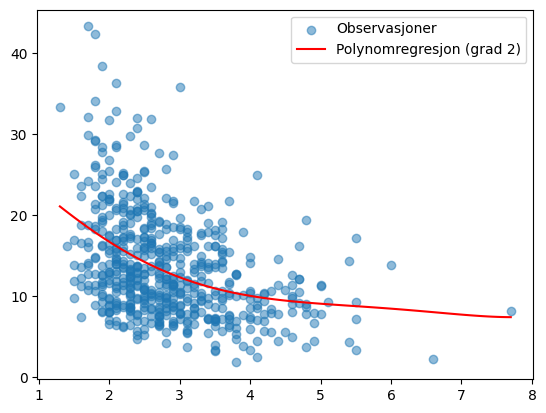

In [89]:
from numpy.polynomial.polynomial import Polynomial

# Tilpass et polynom av grad 2 (kan endres til 3, 4, osv.)
coeffs = Polynomial.fit(x, y, deg=5)

# Evaluer modellen for å få regresjonslinje
x_fit = np.linspace(min(x), max(x), 100)
y_fit = coeffs(x_fit)

# Plot
plt.scatter(x, y, alpha=0.5, label="Observasjoner")
plt.plot(x_fit, y_fit, color="red", label="Polynomregresjon (grad 2)")
plt.legend()
plt.show()


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Anta at du allerede har x og y
# 1. Tilpass polynom
model = Polynomial.fit(x, y, deg=2)  # deg=2 er andregradspolynom

# 2. Evaluer modellen på de opprinnelige x-verdiene
y_pred = model(x)

# 3. Beregn R² manuelt
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# 4. Skriv ut R²
print(f"R² for polynomregresjon: {r2:.2f}")

R² for polynomregresjon: 0.17
